In [2]:
pip install tensorflow


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/ed/b6/62345568cd07de5d9254fcf64d7e44aacbb6abde11ea953b3cb320e58d19/tensorflow-2.17.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.17.0 from https://files.pythonhosted.org/packages/66/03/5c447feceb72f5a38ac2aa79d306fa5b5772f982c2b480c1329c7e382900/tensorflow_intel-2.17.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=24.3.25 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2d


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------- ----------------------- 10.6/26.4 MB 6.0 MB/s eta 0:00:03
   ---------------- ----------------------- 10.9/26.4 MB 5.8 MB/s eta 0:00:03
   ----------------- ---------------------- 11.5/26.4 MB 5.7 MB/s eta 0:00:03
   ------------------ --------------------- 11.9/26.4 MB 5.6 MB/s eta 0:00:03
   ------------------ --------------------- 12.2/26.4 MB 6.2 MB/s eta 0:00:03
   ------------------ --------------------- 12.5/26.4 MB 6.1 MB/s eta 0:00:03
   ------------------- -------------------- 12.8/26.4 MB 6.0 MB/s eta 0:00:03
   ------------------- -------------------- 13.0/26.4 MB 6.0 MB/s eta 0:00:03
   ------------------- -------------------- 13.1/26.4 MB 5.8 MB/s eta 0:00:03
   ------------------- -------------------- 13.1/26.4 MB 5.7 MB/s eta 0:00:03
   ------------------- -------------------- 13.2/26.4 MB 5.5 MB/s eta 0:00:03
   -------------------- ------------------- 13.3/26.4 MB 5.5 MB/s eta 0:00:03
   -------------------- ------------------- 13.5/26.4 MB 5.4 MB

In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input

In [17]:
# Define the dataset path
dataset_path = r"C:\Users\Vennila's gadget\OneDrive\Documents\Prodigy works\Dataset"

In [18]:
# Define the classes and corresponding folders
classes = {
    'Fist': ['FistImages', 'FistTest'],
    'One': ['One', 'OneTest'],
    'Two': ['Two', 'TwoTest'],
    'Three': ['Three', 'ThreeTest'],
    'Palm': ['PalmImages', 'PalmTest'],
    'Swing': ['SwingImages', 'SwingTest']
}

In [19]:
# Load and preprocess images
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, (64, 64))  # Resize images to a consistent size
            images.append(img)
    return images

In [20]:
X = []
y = []

for label, folders in classes.items():
    for folder in folders:
        images = load_images_from_folder(os.path.join(dataset_path, folder))
        X.extend(images)
        y.extend([label] * len(images))

X = np.array(X)
y = np.array(y)

In [21]:
print(X)
print(y)

[[[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  ...

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]]


 [[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  ...

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]]


 [[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0

In [22]:
# Encode labels
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

In [23]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# Normalize the images
X_train = X_train / 255.0
X_test = X_test / 255.0

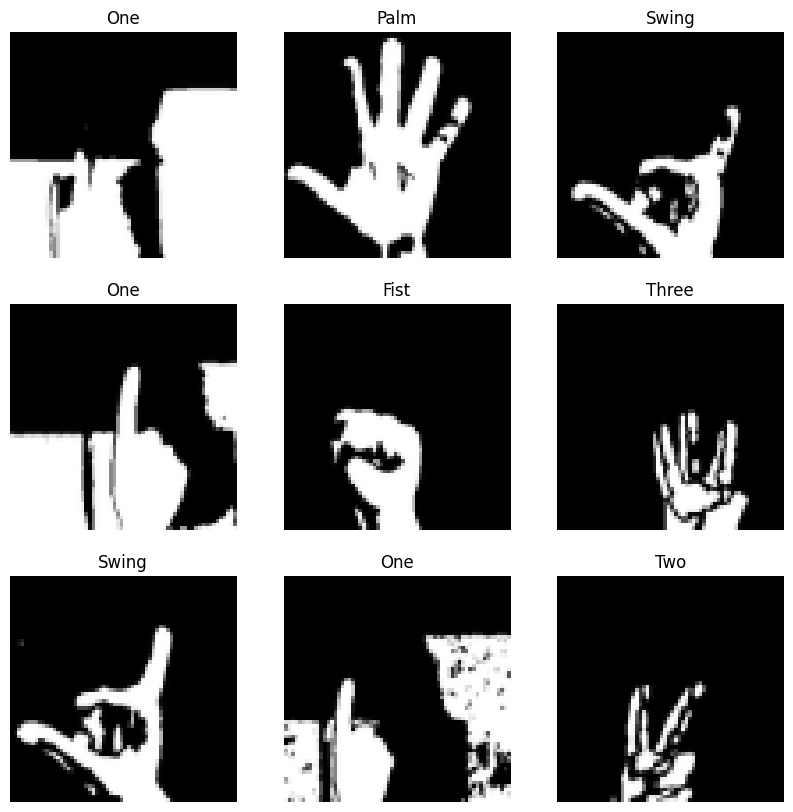

In [25]:
# Data Visualization
def visualize_data(X, y, label_encoder):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(X[i])
        plt.title(label_encoder.inverse_transform([np.argmax(y[i])])[0])
        plt.axis('off')
    plt.show()

visualize_data(X_train, y_train, label_encoder)

In [34]:
# Model Architecture
model = Sequential([
    Input(shape=(64, 64, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(classes), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
# Model Training
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size=32)

Epoch 1/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 62s 352ms/step - accuracy: 0.8073 - loss: 0.4836 - val_accuracy: 0.9972 - val_loss: 0.0143
Epoch 2/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 78s 319ms/step - accuracy: 0.9940 - loss: 0.0152 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 3/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 72s 539ms/step - accuracy: 0.9913 - loss: 0.0249 - val_accuracy: 1.0000 - val_loss: 0.0030
Epoch 4/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 74s 469ms/step - accuracy: 0.9990 - loss: 0.0037 - val_accuracy: 1.0000 - val_loss: 6.5593e-04
Epoch 5/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 58s 431ms/step - accuracy: 0.9964 - loss: 0.0118 - val_accuracy: 1.0000 - val_loss: 5.8574e-04
Epoch 6/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 60s 262ms/step - accuracy: 1.0000 - loss: 7.3564e-04 - val_accuracy: 0.9991 - val_loss: 0.0025
Epoch 7/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 51s 381ms/step - accuracy: 1.0000 - loss: 1.5551e-04 - val_accuracy: 1.0000 - val_loss: 5.2652e-04
Epoch 8/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 85s 399ms/step - accura

In [29]:
# Model Evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9993 - loss: 7.9729e-04
Test Accuracy: 99.85%


In [30]:
# Model Testing and Prediction
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


In [31]:
# Calculate Metrics
print(classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_))


              precision    recall  f1-score   support

        Fist       0.99      1.00      1.00       231
         One       1.00      1.00      1.00       213
        Palm       1.00      1.00      1.00       225
       Swing       1.00      1.00      1.00       219
       Three       1.00      1.00      1.00       206
         Two       1.00      0.99      1.00       226

    accuracy                           1.00      1320
   macro avg       1.00      1.00      1.00      1320
weighted avg       1.00      1.00      1.00      1320



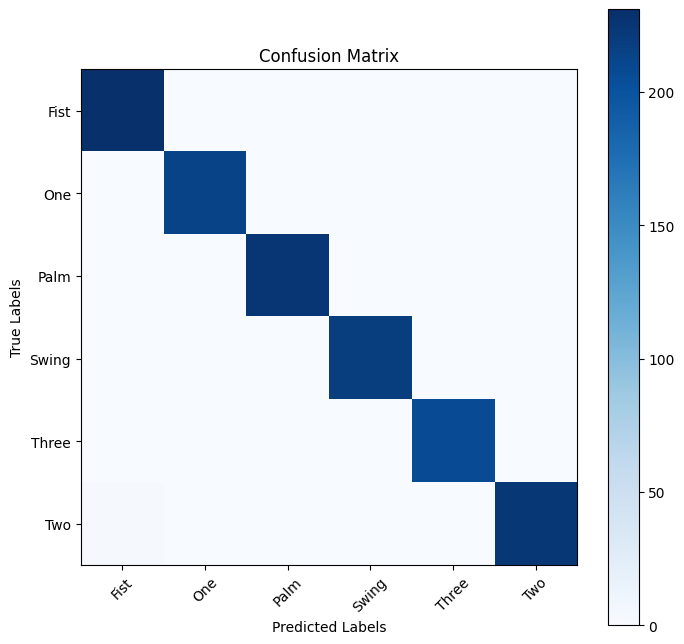

In [32]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 8))
plt.imshow(conf_matrix, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(np.arange(len(classes)), label_encoder.classes_, rotation=45)
plt.yticks(np.arange(len(classes)), label_encoder.classes_)
plt.colorbar()
plt.show()